In [1]:
# Movie Recommendation System Notebook

# Section 1: Libraries and Setup
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner outputs

# Machine Learning Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# For deep learning later
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Dot

In [2]:
credits_df = pd.read_csv(r"D:\Programming\Dataset\tmdb_5000_credits.csv")
movies_df= pd.read_csv(r"D:\Programming\Dataset\tmdb_5000_movies.csv")


In [3]:
credits_df

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [4]:
movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [5]:
print(movies_df.columns)
print(credits_df.columns)


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [6]:
# Rename the 'id' column in movies_df to 'movie_id'
movies_df.rename(columns={'id': 'movie_id'}, inplace=True)

# Merge the datasets
merged_df = movies_df.merge(credits_df, on='movie_id', how='left')

# Display the merged dataframe
print(merged_df.head())


      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage  movie_id  \
0                   http://www.avatarmovie.com/     19995   
1  http://disney.go.com/disneypictures/pirates/       285   
2   http://www.sonypictures.com/movies/spectre/    206647   
3            http://www.thedarkknightrises.com/     49026   
4          http://movies.disney.com/john-carter     49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id

In [7]:
merged_df.head()


,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
# Drop duplicates and unnecessary columns
merged_df = merged_df.drop(columns=['title_y'])
merged_df.rename(columns={'title_x': 'title'}, inplace=True)

In [9]:

# Extract genres, main cast, and director
import ast

def extract_column_data(data, key, top_n=None):
    try:
        data_list = ast.literal_eval(data)
        if top_n:
            return ', '.join([item[key] for item in data_list[:top_n]])
        return ', '.join([item[key] for item in data_list])
    except (ValueError, TypeError, KeyError):
        return None

merged_df['genres'] = merged_df['genres'].apply(lambda x: extract_column_data(x, 'name'))
merged_df['main_cast'] = merged_df['cast'].apply(lambda x: extract_column_data(x, 'name', 3))
merged_df['director'] = merged_df['crew'].apply(lambda x: extract_column_data(x, 'name', 1))

# Save the cleaned data
merged_df.to_csv('cleaned_movies.csv', index=False)

# Display the cleaned data
merged_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,main_cast,director
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","Sam Worthington, Zoe Saldana, Sigourney Weaver",Stephen E. Rivkin
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Johnny Depp, Orlando Bloom, Keira Knightley",Dariusz Wolski
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","Daniel Craig, Christoph Waltz, Léa Seydoux",Thomas Newman
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","Christian Bale, Michael Caine, Gary Oldman",Hans Zimmer
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","Taylor Kitsch, Lynn Collins, Samantha Morton",Andrew Stanton


In [10]:
# Function to extract the director's name
def extract_director(crew_data):
    try:
        crew_list = ast.literal_eval(crew_data)
        for crew_member in crew_list:
            if crew_member['job'] == 'Director':
                return crew_member['name']
        return None
    except (ValueError, KeyError, TypeError):
        return None

# Apply the function to extract director information
merged_df['director'] = merged_df['crew'].apply(extract_director)

# Display the dataframe with director information
print(merged_df[['title', 'director']].head())


                                      title           director
0                                    Avatar      James Cameron
1  Pirates of the Caribbean: At World's End     Gore Verbinski
2                                   Spectre         Sam Mendes
3                     The Dark Knight Rises  Christopher Nolan
4                               John Carter     Andrew Stanton


In [11]:
merged_df.to_csv('cleaned_movies_data.csv', index=False)


In [27]:
merged_df

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,main_cast,director
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","Christian Bale, Michael Caine, Gary Oldman",Christopher Nolan
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","Taylor Kitsch, Lynn Collins, Samantha Morton",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"Action, Crime, Thriller",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...","Carlos Gallardo, Jaime de Hoyos, Peter Marquardt",Robert Rodriguez
4799,9000,"Comedy, Romance",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,[],Released,A newlywed couple's honeymoon is upended by th...,Ne

In [12]:
# Drop unnecessary columns
columns_to_keep = ['movie_id', 'original_title', 'genres', 'keywords', 'overview', 'popularity', 'vote_average']
filtered_df = merged_df[columns_to_keep]

# Display the filtered dataset
print(filtered_df.head())


   movie_id                            original_title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                        genres  \
0  Action, Adventure, Fantasy, Science Fiction   
1                   Adventure, Fantasy, Action   
2                     Action, Adventure, Crime   
3               Action, Crime, Drama, Thriller   
4           Action, Adventure, Science Fiction   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4  [{"id": 818, "name": "based on novel"}, {"id":...   

                   

In [13]:
# Fill missing values in 'overview' with an empty string
filtered_df['overview'] = filtered_df['overview'].fillna('')

# Drop rows with missing critical information (e.g., movie_id, title)
filtered_df = filtered_df.dropna(subset=['movie_id', 'original_title'])

# Check for remaining missing data
print(filtered_df.isnull().sum())


movie_id          0
original_title    0
genres            0
keywords          0
overview          0
popularity        0
vote_average      0
dtype: int64


In [15]:
filtered_df.head()

,movie_id,original_title,genres,keywords,overview,popularity,vote_average
0,19995,Avatar,"Action, Adventure, Fantasy, Science Fiction","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,7.2
1,285,Pirates of the Caribbean: At World's End,"Adventure, Fantasy, Action","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",139.082615,6.9
2,206647,Spectre,"Action, Adventure, Crime","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,107.376788,6.3
3,49026,The Dark Knight Rises,"Action, Crime, Drama, Thriller","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,112.312950,7.6
4,49529,John Carter,"Action, Adventure, Science Fiction","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",43.926995,6.1


In [16]:
import ast

# Function to extract keyword names
def extract_keywords(keyword_data):
    try:
        # Safely parse the JSON-like string
        keywords_list = ast.literal_eval(keyword_data)
        return ', '.join([keyword['name'] for keyword in keywords_list])
    except (ValueError, TypeError):
        return None

# Apply the function to the 'keywords' column
filtered_df['keywords'] = merged_df['keywords'].apply(extract_keywords)

# Display the updated DataFrame
print(filtered_df[['original_title', 'keywords']].head())


                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            keywords  
0  culture clash, future, space war, space colony...  
1  ocean, drug abuse, exotic island, east india t...  
2  spy, based on novel, secret agent, sequel, mi6...  
3  dc comics, crime fighter, terrorist, secret id...  
4  based on novel, mars, medallion, space travel,...  


In [17]:
# Save to a new CSV file
filtered_df.to_csv('cleaned_movie_data_with_keywords.csv', index=False)


In [18]:
filtered_df.head()

,movie_id,original_title,genres,keywords,overview,popularity,vote_average
0,19995,Avatar,"Action, Adventure, Fantasy, Science Fiction","culture clash, future, space war, space colony...","In the 22nd century, a paraplegic Marine is di...",150.437577,7.2
1,285,Pirates of the Caribbean: At World's End,"Adventure, Fantasy, Action","ocean, drug abuse, exotic island, east india t...","Captain Barbossa, long believed to be dead, ha...",139.082615,6.9
2,206647,Spectre,"Action, Adventure, Crime","spy, based on novel, secret agent, sequel, mi6...",A cryptic message from Bond’s past sends him o...,107.376788,6.3
3,49026,The Dark Knight Rises,"Action, Crime, Drama, Thriller","dc comics, crime fighter, terrorist, secret id...",Following the death of District Attorney Harve...,112.312950,7.6
4,49529,John Carter,"Action, Adventure, Science Fiction","based on novel, mars, medallion, space travel,...","John Carter is a war-weary, former military ca...",43.926995,6.1


In [19]:
filtered_df['tags'] = (
    filtered_df['genres'].astype(str) + " " +  # Convert non-string data to string
    filtered_df['keywords'].astype(str) + " " +
    filtered_df['overview'].astype(str)
)

# Optional: Preprocess the 'tags' column
filtered_df['tags'] = filtered_df['tags'].str.lower()  # Convert to lowercase
filtered_df['tags'] = filtered_df['tags'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)  # Remove special characters


In [20]:
# Drop the individual columns that have been combined into 'tags'
filtered_df = filtered_df.drop(columns=['genres', 'keywords', 'overview'])

# Display the final structure of your dataframe
print(filtered_df.head())


   movie_id                            original_title  popularity  \
0     19995                                    Avatar  150.437577   
1       285  Pirates of the Caribbean: At World's End  139.082615   
2    206647                                   Spectre  107.376788   
3     49026                     The Dark Knight Rises  112.312950   
4     49529                               John Carter   43.926995   

   vote_average                                               tags  
0           7.2  action adventure fantasy science fiction cultu...  
1           6.9  adventure fantasy action ocean drug abuse exot...  
2           6.3  action adventure crime spy based on novel secr...  
3           7.6  action crime drama thriller dc comics crime fi...  
4           6.1  action adventure science fiction based on nove...  


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000)
tfidf_matrix = tfidf.fit_transform(filtered_df['tags']).toarray()


In [22]:
tfidf_matrix.shape

(4803, 10000)

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

print(similarity_matrix.shape)


(4803, 4803)


In [24]:
filtered_df

,movie_id,original_title,popularity,vote_average,tags
0,19995,Avatar,150.437577,7.2,action adventure fantasy science fiction cultu...
1,285,Pirates of the Caribbean: At World's End,139.082615,6.9,adventure fantasy action ocean drug abuse exot...
2,206647,Spectre,107.376788,6.3,action adventure crime spy based on novel secr...
3,49026,The Dark Knight Rises,112.312950,7.6,action crime drama thriller dc comics crime fi...
4,49529,John Carter,43.926995,6.1,action adventure science fiction based on nove...
...,...,...,...,...,...
4798,9367,El Mariachi,14.269792,6.6,action crime thriller united statesmexico barr...
4799,72766,Newlyweds,0.642552,5.9,comedy romance a newlywed couples honeymoon i...
4800,231617,"Signed, Sealed, Delivered",1.444476,7.0,comedy drama romance tv movie date love at fir...
4801,126186,Shanghai Calling,0.857008,5.7,when ambitious new york attorney sam is sent...


In [25]:
def get_recommendations(title,similarity_matrix,filtered_df):
    idx = filtered_df[filtered_df['original_title'] == title].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1],reverse =True)
    sim_scores = sim_scores[1:11]
    movie_indices =[i[0] for i in sim_scores]
    return filtered_df['original_title'].iloc[movie_indices]

recommendations = get_recommendations('The Dark Knight Rises',similarity_matrix,filtered_df)
    
    
    

In [26]:
recommendations

65                              The Dark Knight
428                              Batman Returns
1359                                     Batman
119                               Batman Begins
299                              Batman Forever
210                              Batman & Robin
3854    Batman: The Dark Knight Returns, Part 2
9            Batman v Superman: Dawn of Justice
3819                                   Defendor
2507                                  Slow Burn
Name: original_title, dtype: object

In [31]:
merged_df.head()


,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,main_cast,director
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","Christian Bale, Michael Caine, Gary Oldman",Christopher Nolan
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...","Taylor Kitsch, Lynn Collins, Samantha Morton",Andrew Stanton


In [32]:
import pandas as pd
import ast  # To safely evaluate JSON-like strings

# Function to process JSON-like columns
def process_json_column(column_data, key, top_n=None):
    """
    Extracts specified key from JSON-like strings in a column.

    Args:
        column_data (pd.Series): The column containing JSON-like strings.
        key (str): The key to extract from the JSON.
        top_n (int, optional): If set, limits to the top N results.

    Returns:
        pd.Series: Extracted values as strings.
    """
    def extract_values(json_string):
        try:
            data = ast.literal_eval(json_string)
            if isinstance(data, list):
                values = [item[key] for item in data if key in item]
                if top_n:
                    values = values[:top_n]
                return ' '.join(values)
            return ''
        except (ValueError, SyntaxError):
            return ''
    
    return column_data.apply(extract_values)

# Process `keywords`, `production_companies`, and `spoken_languages`
merged_df['keywords_processed'] = process_json_column(merged_df['keywords'], 'name', top_n=5)
merged_df['production_companies_processed'] = process_json_column(merged_df['production_companies'], 'name', top_n=3)
merged_df['spoken_languages_processed'] = process_json_column(merged_df['spoken_languages'], 'name')

# Process `cast` for main actors and `crew` for director
merged_df['cast_processed'] = process_json_column(merged_df['cast'], 'name', top_n=5)
merged_df['director'] = merged_df['crew'].apply(
    lambda x: ' '.join([item['name'] for item in ast.literal_eval(x) if item.get('job') == 'Director']) if pd.notnull(x) else ''
)

# Select only the necessary columns for the new DataFrame
new_merged_df = merged_df[[
    'title', 'genres', 'overview', 'keywords_processed', 'production_companies_processed',
    'spoken_languages_processed', 'cast_processed', 'director', 'vote_average', 'vote_count'
]].rename(columns={
    'keywords_processed': 'keywords',
    'production_companies_processed': 'production_companies',
    'spoken_languages_processed': 'spoken_languages',
    'cast_processed': 'main_cast'
})

# Display the new DataFrame
new_merged_df.head()


,title,genres,overview,keywords,production_companies,spoken_languages,main_cast,director,vote_average,vote_count
0,Avatar,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...",culture clash future space war space colony so...,Ingenious Film Partners Twentieth Century Fox ...,English Español,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,7.2,11800
1,Pirates of the Caribbean: At World's End,"Adventure, Fantasy, Action","Captain Barbossa, long believed to be dead, ha...",ocean drug abuse exotic island east india trad...,Walt Disney Pictures Jerry Bruckheimer Films S...,English,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,6.9,4500
2,Spectre,"Action, Adventure, Crime",A cryptic message from Bond’s past sends him o...,spy based on novel secret agent sequel mi6,Columbia Pictures Danjaq B24,Français English Español Italiano Deutsch,Daniel Craig Christoph Waltz Léa Seydoux Ralph...,Sam Mendes,6.3,4466
3,The Dark Knight Rises,"Action, Crime, Drama, Thriller",Following the death of District Attorney Harve...,dc comics crime fighter terrorist secret ident...,Legendary Pictures Warner Bros. DC Entertainment,English,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan,7.6,9106
4,John Carter,"Action, Adventure, Science Fiction","John Carter is a war-weary, former military ca...",based on novel mars medallion space travel pri...,Walt Disney Pictures,English,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton,6.1,2124


In [33]:
# Ensure the new DataFrame is processed and available as new_merged_df
filtered_df1 = new_merged_df.copy()

# Combine features into a single field for TF-IDF
filtered_df1['combined_features'] = (
    filtered_df1['genres'].fillna('') + ' ' +
    filtered_df1['main_cast'].fillna('') + ' ' +
    filtered_df1['director'].fillna('') + ' ' +
    filtered_df1['overview'].fillna('') + ' ' +
    filtered_df1['keywords'].fillna('') + ' ' +
    filtered_df1['production_companies'].fillna('') + ' ' +
    filtered_df1['spoken_languages'].fillna('')
)

# Convert text to numerical vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(filtered_df1['combined_features'])

# Convert sparse matrix to dense format for deep learning
tfidf_dense = tfidf_matrix.todense()

# Print shapes to confirm
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Dense Matrix Shape:", tfidf_dense.shape)


TF-IDF Matrix Shape: (4803, 5000)
Dense Matrix Shape: (4803, 5000)


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Input layer
input_dim = tfidf_dense.shape[1]
input_layer = Input(shape=(input_dim,), name='Input')

# Encoder: Compress the data
encoded = Dense(512, activation='relu', name='Encoder_1')(input_layer)
encoded = Dense(256, activation='relu', name='Encoder_2')(encoded)
encoded = Dense(128, activation='relu', name='Latent_Space')(encoded)

# Decoder: Reconstruct the data
decoded = Dense(256, activation='relu', name='Decoder_1')(encoded)
decoded = Dense(512, activation='relu', name='Decoder_2')(decoded)
decoded = Dense(input_dim, activation='sigmoid', name='Output')(decoded)

# Create autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(
    tfidf_dense,  # Input features
    tfidf_dense,  # Reconstruct the same features
    batch_size=32,
    epochs=10,
    validation_split=0.2
)

# Extract the encoder part of the model to get compact embeddings
encoder = Model(inputs=input_layer, outputs=encoded)
movie_embeddings = encoder.predict(tfidf_dense)


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - loss: 0.0941 - val_loss: 2.0000e-04
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 2.0000e-04 - val_loss: 2.0000e-04
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - loss: 2.0000e-04 - val_loss: 2.0000e-04
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - loss: 2.0000e-04 - val_loss: 2.0000e-04
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - loss: 2.0000e-04 - val_loss: 2.0000e-04
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 2.0000e-04 - val_loss: 2.0000e-04
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 2.0000e-04 - val_loss: 2.0000e-04
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 2.0000e-04 - val_loss: 2.0000e-04
Epoch 9/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 2.0000e-04 - val_loss: 2.0000e-04
Epoch 10/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 2.0000e-04 - val_loss: 2.0000e-04
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute similarity between movies based on learned embeddings
embedding_similarity = cosine_similarity(movie_embeddings)

# Recommendation function
def recommend_movies_deep(title, df=merged_df, similarity_matrix=embedding_similarity, top_n=10):
    idx = df[df['title'].str.contains(title, case=False, na=False)].index

    if idx.empty:
        return "Movie not found. Please try another title."
    
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_indices = [i[0] for i in sim_scores[1:top_n+1]]  # Skip the first (same movie)

    # Return recommended movies
    return df.iloc[sim_indices][['title', 'genres', 'main_cast', 'director']]

# Example: Recommend movies similar to "The Dark Knight Rises"
recommend_movies_deep("The Notebook")


,title,genres,main_cast,director
2461,Moonrise Kingdom,"Comedy, Drama, Romance","Bruce Willis, Edward Norton, Jared Gilman",Wes Anderson
1384,Friends with Benefits,"Romance, Comedy","Justin Timberlake, Mila Kunis, Patricia Clarkson",Will Gluck
4696,Weekend,"Drama, Romance","Tom Cullen, Chris New, Jonathan Race",Andrew Haigh
242,Fantastic Four,"Action, Adventure, Science Fiction","Miles Teller, Kate Mara, Michael B. Jordan",Josh Trank
196,Megamind,"Animation, Action, Comedy, Family, Science Fic...","Will Ferrell, Brad Pitt, Tina Fey",Tom McGrath
3680,Lady in White,"Horror, Thriller","Lukas Haas, Len Cariou, Alex Rocco",Frank LaLoggia
1098,Love in the Time of Cholera,"Drama, Romance","Javier Bardem, Unax Ugalde, Benjamin Bratt",Mike Newell
115,Hancock,"Fantasy, Action","Will Smith, Charlize Theron, Jason Bateman",Peter Berg
342,Men in Black,"Action, Adventure, Comedy, Science Fiction","Tommy Lee Jones, Will Smith, Linda Fiorentino",Barry Sonnenfeld
658,Death Race,"Action, Thriller, Science Fiction","Jason Statham, Joan Allen, Ian McShane",Paul W.S. Anderson


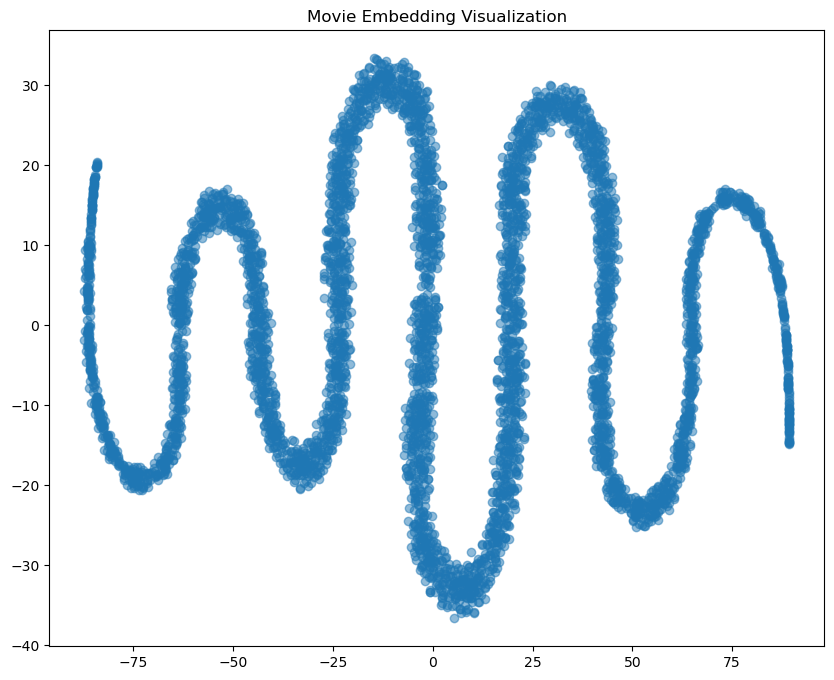

In [39]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(movie_embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
plt.title("Movie Embedding Visualization")
plt.show()


In [46]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics.pairwise import cosine_similarity

# Load your saved model components
filtered_df = joblib.load("filtered_df.pkl")
tfidf_similarity = joblib.load("tfidf_similarity.pkl")
embedding_similarity = joblib.load("embedding_similarity.pkl")

# Combine the similarities with a weighted average
alpha = 0.5  # Weight for TF-IDF similarity
hybrid_similarity = alpha * tfidf_similarity + (1 - alpha) * embedding_similarity

def get_hybrid_recommendations(title, hybrid_similarity, filtered_df, n_recommendations=10):
    try:
        # Get the index of the input movie
        idx = filtered_df[filtered_df['original_title'] == title].index[0]

        # Calculate similarity scores
        sim_scores = list(enumerate(hybrid_similarity[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:n_recommendations + 1]

        # Format recommendations
        recommendations = []
        for i, score in sim_scores:
            recommendations.append({
                'title': filtered_df['original_title'].iloc[i],
                'similarity_score': float(score)
            })
        return recommendations
    except IndexError:
        return f"Movie '{title}' not found in the database."
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Streamlit UI
st.title("Movie Recommendation System")

# Movie selection
st.header("Get Recommendations")
selected_movie = st.selectbox("Select a movie:", filtered_df['original_title'])
n_recommendations = st.slider("Number of recommendations:", 1, 10, 5)

if st.button("Get Recommendations"):
    recommendations = get_hybrid_recommendations(
        title=selected_movie,
        hybrid_similarity=hybrid_similarity,
        filtered_df=filtered_df,
        n_recommendations=n_recommendations
    )
    
    if isinstance(recommendations, list):
        st.write("Recommendations:")
        for rec in recommendations:
            st.write(f"**{rec['title']}** - Similarity Score: {rec['similarity_score']:.2f}")
    else:
        st.write(recommendations)

# Feedback section
st.header("Provide Feedback")
user_id = st.text_input("User ID:")
movie_id = st.text_input("Movie ID (from recommendations):")
rating = st.slider("Rating (1-5):", 1.0, 5.0, 3.0)
watch_time = st.number_input("Watch Time (minutes):", min_value=0, value=0)
click_through = st.checkbox("Did you click through?")
alpha_value = st.slider("Alpha Value (if applicable):", 0.0, 1.0, 0.5)

if st.button("Submit Feedback"):
    # Placeholder for recording feedback
    st.success("Feedback submitted successfully!")


Top Movie Recommendations:
1. The Dark Knight (Similarity: 0.7414)
2. Batman Begins (Similarity: 0.7334)
3. Batman Forever (Similarity: 0.6869)
4. Batman Returns (Similarity: 0.6828)
5. Batman (Similarity: 0.6713)
6. Batman: The Dark Knight Returns, Part 2 (Similarity: 0.6468)
7. Batman v Superman: Dawn of Justice (Similarity: 0.6211)
8. Batman & Robin (Similarity: 0.6200)
9. Suicide Squad (Similarity: 0.5966)
10. The Prestige (Similarity: 0.5900)


In [47]:
from datetime import datetime


class RecommenderEvaluator:
    def __init__(self, filtered_df):
        self.filtered_df = filtered_df
        self.feedback_data = pd.DataFrame(columns=[
            'user_id', 'movie_id', 'recommendation_date', 
            'watch_time', 'click_through', 'alpha_value'
        ])
        
    def parameter_tuning(self, tfidf_similarity, embedding_similarity, alpha_range=np.arange(0, 1.1, 0.1)):
        """
        Tune the alpha parameter using a simple grid search
        """
        best_alpha = 0
        best_score = 0
        
        results = []
        for alpha in alpha_range:
            hybrid_similarity = (alpha * tfidf_similarity + 
                               (1 - alpha) * embedding_similarity)
            
            # Evaluate hybrid similarity (e.g., use average similarity score as a proxy for effectiveness)
            avg_similarity_score = np.mean(hybrid_similarity)
            results.append({
                'alpha': alpha,
                'avg_similarity_score': avg_similarity_score
            })
            
            if avg_similarity_score > best_score:
                best_score = avg_similarity_score
                best_alpha = alpha
                
        return pd.DataFrame(results), best_alpha
    
    def record_user_feedback(self, user_id, movie_id, watch_time=None, click_through=None, alpha_value=None):
        """
        Record user feedback for a recommendation
        """
        feedback = {
            'user_id': user_id,
            'movie_id': movie_id,
            'recommendation_date': datetime.now(),
            'watch_time': watch_time,
            'click_through': click_through,
            'alpha_value': alpha_value
        }
        
        self.feedback_data = pd.concat([
            self.feedback_data, 
            pd.DataFrame([feedback])
        ], ignore_index=True)
    
    def analyze_feedback(self, time_period=None):
        """
        Analyze collected user feedback
        """
        if time_period:
            feedback = self.feedback_data[
                self.feedback_data['recommendation_date'] >= time_period
            ]
        else:
            feedback = self.feedback_data
            
        analysis = {
            'click_through_rate': feedback['click_through'].mean(),
            'average_watch_time': feedback['watch_time'].mean(),
            'performance_by_alpha': feedback.groupby('alpha_value')['click_through'].mean()
        }
        
        return analysis

    def get_recommendations_with_explanation(self, title, hybrid_similarity, n_recommendations=10):
        """
        Get recommendations with explanations based on feature similarity
        """
        idx = self.filtered_df[self.filtered_df['original_title'] == title].index[0]
        sim_scores = list(enumerate(hybrid_similarity[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:n_recommendations + 1]
        
        recommendations = []
        for i, score in sim_scores:
            movie = self.filtered_df.iloc[i]
            explanation = self._generate_explanation(movie, 
                                                     self.filtered_df.iloc[idx])
            recommendations.append({
                'title': movie['original_title'],
                'similarity_score': score,
                'explanation': explanation
            })
        return recommendations
    
    def _generate_explanation(self, recommended_movie, reference_movie):
        """
        Generate user-friendly explanation for recommendation
        """
        similar_features = []
        
        if 'genres' in recommended_movie and 'genres' in reference_movie:
            common_genres = set(recommended_movie['genres'].split(',')) & \
                            set(reference_movie['genres'].split(','))
            if common_genres:
                similar_features.append(f"similar genres: {', '.join(common_genres)}")
        
        return " and ".join(similar_features)

# Example usage
# Assuming tfidf_similarity, embedding_similarity, and filtered_df are defined in the notebook

evaluator = RecommenderEvaluator(filtered_df)

# Parameter tuning
results_df, best_alpha = evaluator.parameter_tuning(
    tfidf_similarity,
    embedding_similarity
)

# Record feedback
evaluator.record_user_feedback(
    user_id='user123',
    movie_id='movie456',
    watch_time=45,  # minutes
    click_through=True,
    alpha_value=best_alpha
)

# Analyze feedback
analysis = evaluator.analyze_feedback()

# Get recommendations with explanations
recommendations = evaluator.get_recommendations_with_explanation(
    'The Dark Knight Rises', 
    tfidf_similarity * best_alpha + embedding_similarity * (1 - best_alpha)
)


In [48]:
recommendations

[{'title': 'Stake Land',
  'similarity_score': 0.9999808073043823,
  'explanation': ''},
 {'title': 'I Am Sam',
  'similarity_score': 0.9999793767929077,
  'explanation': ''},
 {'title': 'Catch Me If You Can',
  'similarity_score': 0.9999793171882629,
  'explanation': ''},
 {'title': 'American Hero',
  'similarity_score': 0.9999790191650391,
  'explanation': ''},
 {'title': 'Raise Your Voice',
  'similarity_score': 0.9999788403511047,
  'explanation': ''},
 {'title': 'Bless the Child',
  'similarity_score': 0.9999784827232361,
  'explanation': ''},
 {'title': 'The Notebook',
  'similarity_score': 0.9999781847000122,
  'explanation': ''},
 {'title': 'Hancock',
  'similarity_score': 0.9999780654907227,
  'explanation': ''},
 {'title': 'Legend',
  'similarity_score': 0.9999775290489197,
  'explanation': ''},
 {'title': 'Atonement',
  'similarity_score': 0.9999774694442749,
  'explanation': ''}]

In [50]:
import joblib

# Save components
joblib.dump(filtered_df, "filtered_df.pkl")
joblib.dump(tfidf_similarity, "tfidf_similarity.pkl")
joblib.dump(embedding_similarity, "embedding_similarity.pkl")
joblib.dump(best_alpha, "best_alpha.pkl")

print("Model components saved successfully!")


FileNotFoundError: [Errno 2] No such file or directory: 'model_components.pkl'